In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dF = pd.read_csv(r'C:\Users\laptop\Desktop\DataScience\Fraud.csv')
dF.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dF.isnull().sum()        # Checking for any missing data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
dF.amount.describe()  # Describes various Statistical factors

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [5]:
df1 = dF[dF.isFraud ==1]

In [6]:
len(df1)

8213

## Handelling the imbalanced dataset

We will down sample the the dataset which is creating imbalance. This will be done by choosing randomly datapoints counts nearing to counts of the former. This also called 'Down Sampleling'.

In [7]:
df2 = dF[dF.isFraud == 0]

In [8]:
DF = df2.sample(frac=0.00167)

In [9]:
df4 = pd.concat([df1,DF],axis=0,ignore_index=True)

In [10]:
df4.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [11]:
df4.to_csv('Fraud1.csv')

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Detecting Outliers through visualisations

In [13]:
df = pd.read_csv(r'C:\Users\laptop\Fraud1.csv')
df.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

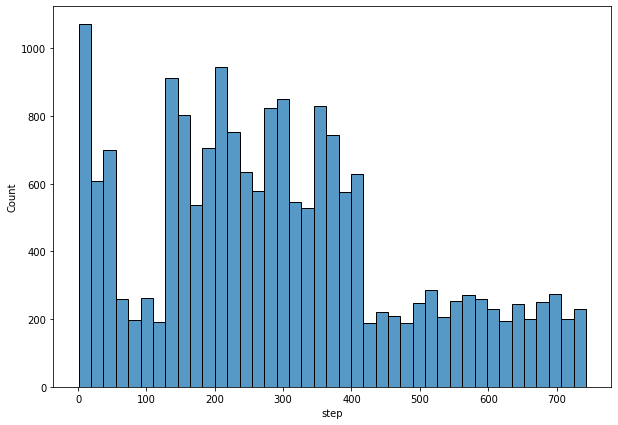

In [115]:
df.step.value_counts()
sns.histplot(df.step)
plt.rcParams['figure.figsize'] = [10,7]

The histogram shows that most number of steps are 1, so many prefer simple transaction methods.

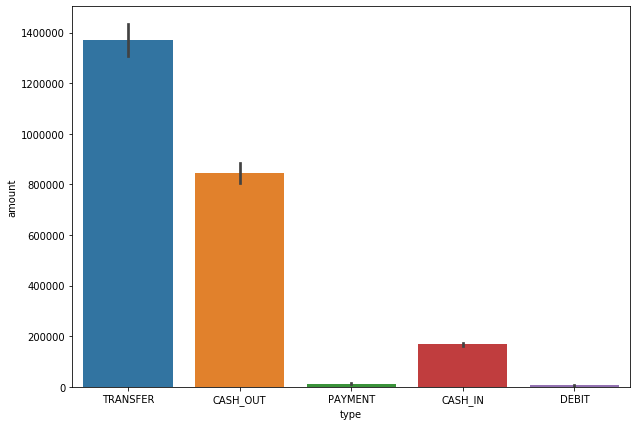

In [16]:
sns.barplot(x = 'type', y = 'amount', data=df)
plt.show()

So, most likely the 'Transfer' contains the fraud transactions because it very large in number. Cash out can also conation fraud transcations.

In [17]:
df.isnull().sum()     # Checking for any missing data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [116]:
dffff = df.amount.describe()  # Describes various Statistical factors
pd.DataFrame(dffff)

,amount
count,1.882500e+04
mean,7.359958e+05
std,1.747197e+06
min,0.000000e+00
25%,2.923734e+04
50%,1.540523e+05
75%,4.523885e+05
max,1.539820e+07


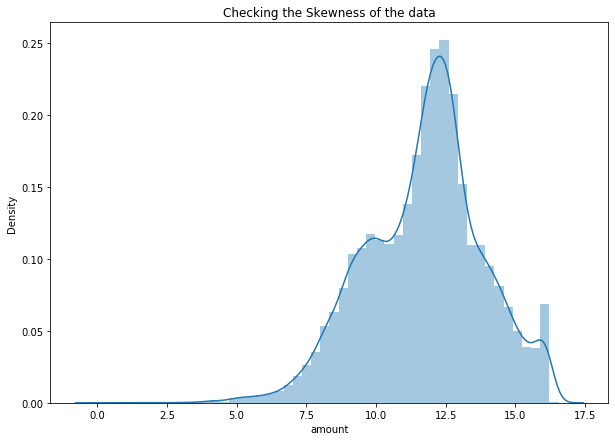

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
dff = df[df.amount!=0]
p = sns.distplot(np.log(dff['amount'])).set(title='Checking the Skewness of the data')  # Highly Right Skewed Data
#plt.ylim([0,10**(-8)])
#plt.xlim(0,3*10**7)
plt.rcParams['figure.figsize'] = [10,10]

The tail of the amount of transaction distribuation is towards left, so this a 'Right Skewed Gaussian Data'. In such a dataset, the 'median' is more meaningfull than the 'mean'. Lets calculate the amount of skewness.

In [21]:
from scipy.stats import skew
skew(df.amount)

3.8804108648778044

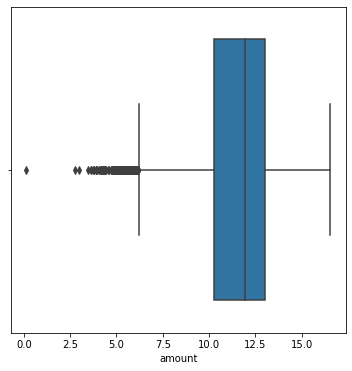

In [120]:
fdd = df[df.amount!=0]
sns.boxplot(np.log(fdd.amount))
plt.show()
plt.rcParams['figure.figsize'] = [6,6]

Thus, the outliers are in the less amount region, so most probably these are the fraud transactions.

In [23]:
df['isFraud'].value_counts()

0    10612
1     8213
Name: isFraud, dtype: int64

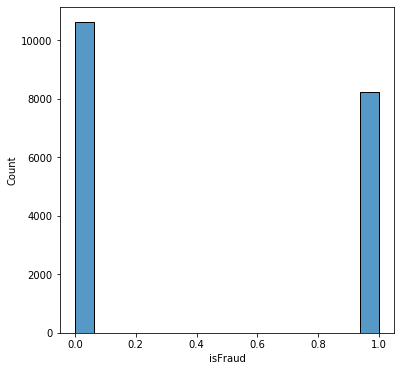

In [121]:
sns.histplot(df['isFraud'])
plt.show()

So, we removed the imbalance in the dataset quiet a lot. Now, we can apply our ML and DL models, but before that we need to rescale the numerical data. 

## Scaling the Continous data using min max scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
Fraud = df[df['isFraud'] == 1]    
Normal = df[df['isFraud']==0]
df1 = df.copy()
df1 = pd.get_dummies(df1,columns=['type'])
df2 = df1.copy()
df2.drop(['nameOrig','nameDest'],axis=1,inplace=True)
x = df2.drop(['isFraud','isFlaggedFraud'],axis=1)
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x)
y = df2.isFraud

In [26]:
x = pd.DataFrame(x1, columns=x.columns)

In [27]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.000012,0.000003,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.000012,0.000003,0.0,0.000090,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.000182,0.000047,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000182,0.000047,0.0,0.000111,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001307,0.000338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
change = ['step','type_CASH_IN','type_CASH_OUT',	'type_DEBIT',	'type_PAYMENT',	'type_TRANSFER']
 
    
for i in change:
    x[i] = x[i].apply(lambda x: int(x))

In [29]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0.000012,0.000003,0.0,0.000000,0.0,0,0,0,0,1
1,0,0.000012,0.000003,0.0,0.000090,0.0,0,1,0,0,0
2,0,0.000182,0.000047,0.0,0.000000,0.0,0,0,0,0,1
3,0,0.000182,0.000047,0.0,0.000111,0.0,0,1,0,0,0
4,0,0.001307,0.000338,0.0,0.000000,0.0,0,0,0,0,1


### Statistical measures of the Fraud & Normal transactions

In [30]:
Fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [31]:
Normal.amount.describe()

count    1.061200e+04
mean     1.694973e+05
std      4.542072e+05
min      1.120000e+00
25%      1.307477e+04
50%      6.997889e+04
75%      2.052441e+05
max      1.539820e+07
Name: amount, dtype: float64

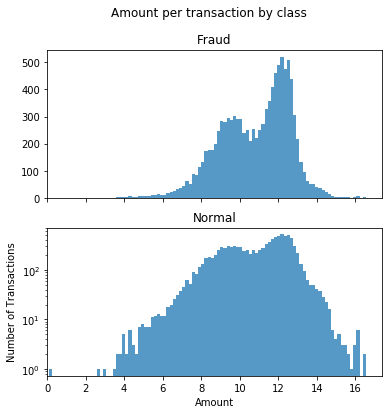

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Amount per transaction by class')
bins = 100
ax1.hist(np.log(dff[dff.isFraud==0].amount), bins = bins,alpha=0.75)
ax1.set_title('Fraud')
ax2.hist(np.log(Normal.amount), bins = bins,alpha=0.75)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.rcParams['figure.figsize'] = [10, 7]
#plt.grid(True)
#ax1.grid(True)
plt.xlim([0,None])
plt.show()

The above plot compares the amount of 'Normal' vs 'Fraud' transactions. This shows fraudalent transactions are less in amounts, but they cannot be separated using 'Anomaly detection', because the the norml data is mixed with it.

## Model Selection Process

So, as we can see that this dataset contains Categorical as well as Numeric data, it will be good to use a 'Descision Tree Classifier'. But, we have many optimised versions of the 'Descision Tree Classifier', we will use them one by one any evalute the best model upon the performance metrics. We, will also use 'Artificial Neural Networks' to do this.



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)           # Diving the dataset into training and testing dataset

In [35]:
y_test.value_counts()

0    3122
1    2526
Name: isFraud, dtype: int64

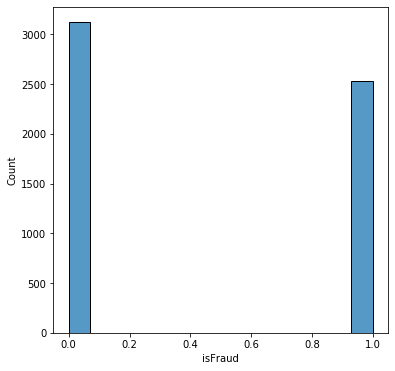

In [124]:
sns.histplot(y_test)
plt.show()

In [36]:
outlier_fraction = len(Fraud)/len(Normal)

In [59]:
Isf = IsolationForest(max_samples=len(x_train), contamination = 0.01,verbose=0, n_estimators=100)
lof = LocalOutlierFactor(contamination = 0.01)
svm = SVC()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xg = XGBClassifier()
Ada = AdaBoostClassifier()

In [61]:
y_prec = lof.fit_predict(x_test)
Isf.fit(x_train,y_train)
y_pred = Isf.predict(x_test)
svm.fit(x_train,y_train)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

### Choosing the right evaluation Metrics

We have to also use other evaluation matrics along with the 'Accuracy'. This is because our aim is to predict fraud transactions. For, this particular instance, we would like to detect the 'Fraudlent' transactions, by keeping in mind that no 'Normal' transaction is refered as 'Fraudlent'. Also, no 'Fraudlent' transaction should be refered as 'Normal'. These are also called the 'Type-I Error and 'Type-II Error in statistics.

### Prescision, Recall & Area Under Curve (AUC)

'Precesion' and 'Recall' are the evaluation metrics very usefull for specific purposes. 'Precesion' is the ratio of 'True Positive' and the sum of both 'True Positive' and 'False Positive'. Here, the 'True Positive' is Fraud Detection. Similarly, in 'Recall' instead of 'False Positive' it is 'False Negetive'. Now, by keeping a 'Descision Thersold', we will get different values of the both. And, if we plot them, we get a curve also known as the 'ROC'. The area under this curve is important, because it's a measure of the desirable values of the both 'Precesion' and 'Recall'. This is also called the Area Under Curve (AUC).

## Choosing the best model w.r.t the AUC score

In [39]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_score, confusion_matrix,recall_score

In [111]:
# Local Outlier Factor
y_prec[y_prec == 1] = 0
y_prec[y_prec == -1] = 1

Model: SVM
Accuracy: 0.8275495750708215
Precision: 0.8770651117589893
AUC: 0.8167653457215998


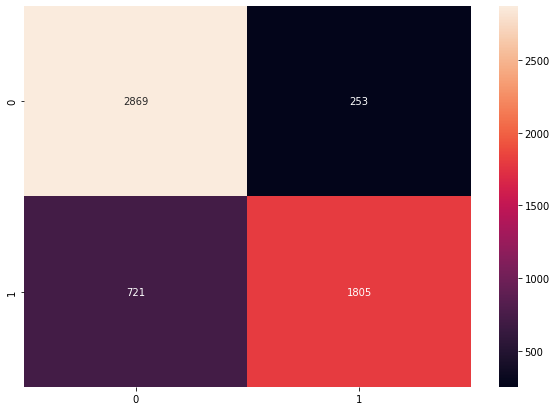

In [102]:
print('Model: SVM')
y_presvm = svm.predict(x_test)
cm11 = confusion_matrix(y_test,y_presvm)
print('Accuracy:', svm.score(x_test, y_test))
print('Precision:', precision_score(y_test, y_presvm))
print('AUC:', roc_auc_score(y_test, y_presvm) )
sns.heatmap(cm11,annot=True,fmt='d')
plt.show()

Model: Isolation Forest
AUC: 0.49639381438801994


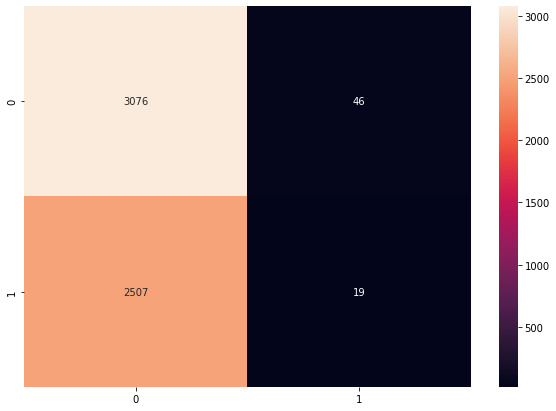

In [114]:
print('Model: Isolation Forest')
#print('Precision:', precision_score(y_test,y_pred)
print('AUC:',roc_auc_score(y_test,y_pred))
cm1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

Model: Local outlier Factor
AUC: 0.5


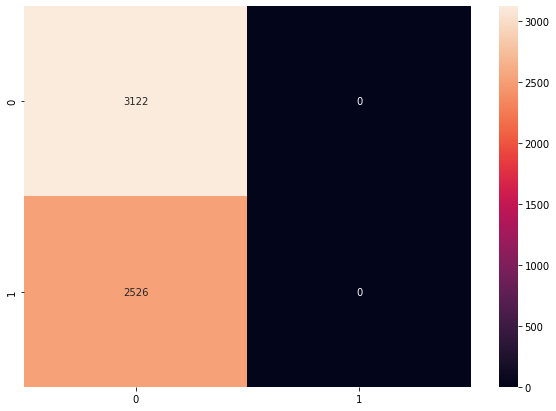

In [113]:
print('Model: Local outlier Factor')
#print('Accuracy:', lof.predict(x_test, y_test) )
#print('Precision:', precision_score(y_test, y_prec))
print('AUC:', roc_auc_score(y_test, y_prec) )
cm1 = confusion_matrix(y_test,y_prec)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

In [77]:
rf.fit(x_train,y_train)         # Random Forest
y_prerf = rf.predict(x_test)

Model: Random Forest
Accuracy: 0.9916784702549575
Precision: 0.9855072463768116
AUC: 0.992094897245457


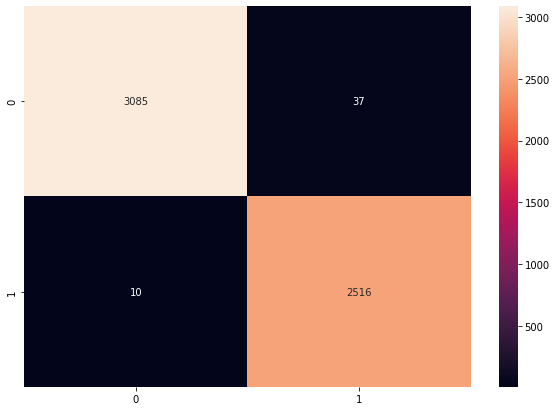

In [80]:
print('Model: Random Forest')
print('Accuracy:', rf.score(x_test, y_test))
print('Precision:', precision_score(y_test,y_prerf) )
print('AUC:',roc_auc_score(y_test,y_prerf))
cm1 = confusion_matrix(y_test,y_prerf)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

In [82]:
gb.fit(x_train,y_train)         # Gradiant Boost
y_pregb = gb.predict(x_test)

Model: Gradiant Boost
Accuracy: 0.9872521246458924
Precision: 0.9770606531881804
AUC: 0.9879776905702793


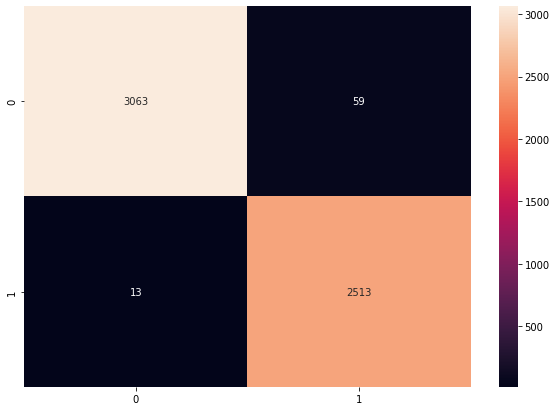

In [88]:
print('Model: Gradiant Boost')
print('Accuracy:', (gb.score(x_test, y_test)))
print('Precision:', precision_score(y_test,y_pregb) )
print('AUC:',roc_auc_score(y_test,y_pregb ))
cm1 = confusion_matrix(y_test,y_pregb)
sns.heatmap(cm1,annot=True, fmt='d')
plt.show()

In [89]:
xg.fit(x_train,y_train)          # Xg Boost
y_prexg = xg.predict(x_test)

Model: Xg Boost
Accuracy: 0.9946883852691218
Precision: 0.9909520062942565
AUC: 0.9949308739398532


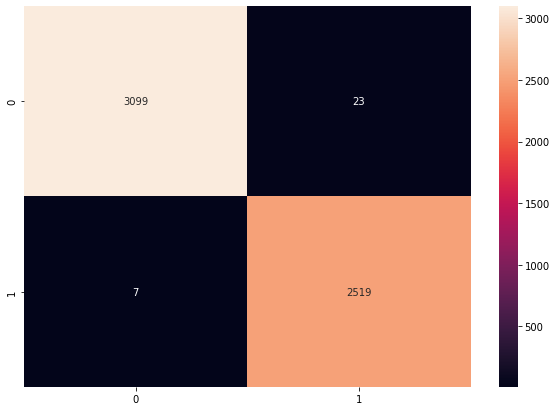

In [91]:
print('Model: Xg Boost')
print('Accuracy:', xg.score(x_test, y_test))
print('Precision:', precision_score(y_test,y_prexg))
print('AUC:',roc_auc_score(y_test,y_prexg ))
cm6 = confusion_matrix(y_test,y_prexg)
sns.heatmap(cm6,annot=True, fmt='d')
plt.show()

In [93]:
Ada.fit(x_train,y_train)          # Ada Boost
y_preaba = Ada.predict(x_test)

Model: Ada Boost
Accuracy: 0.9714943342776204
Precision: 0.9567400540749325
AUC: 0.9723636512112594


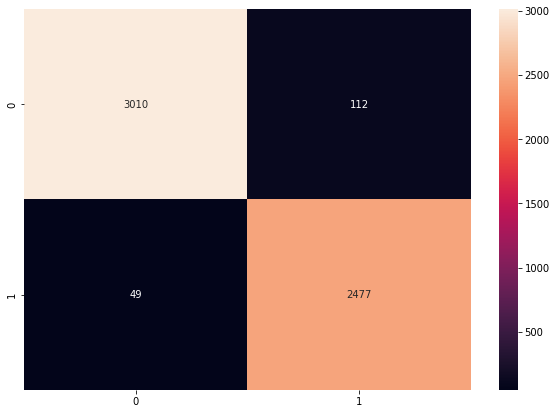

In [95]:
print('Model: Ada Boost')
print('Accuracy:', Ada.score(x_test, y_test))
print('Precision:', precision_score(y_test,y_preaba) )
print('AUC:',roc_auc_score(y_test,y_preaba ))
cm8 = confusion_matrix(y_test,y_preaba)
sns.heatmap(cm8,annot=True, fmt='d')
plt.show()

In [54]:
# Neural Networks
from tensorflow import keras

model1 = keras.Sequential([
keras.layers.Dense(11, input_shape=(11,),activation='relu'),
#keras.layers.Dropout(0.2),
keras.layers.Dense(8,activation='relu'),
#keras.layers.Dropout(0.1),
keras.layers.Dense(5,activation='relu'),
#keras.layers.Dropout(0.1),
#keras.layers.Dense(3,activation='relu'),
#keras.layers.Dropout(0.1),
keras.layers.Dense(1,activation='sigmoid')])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
412/412 [==============================] - 4s 2ms/step - loss: 0.5375 - accuracy: 0.7759
Epoch 2/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8311
Epoch 3/100
412/412 [==============================] - 1s 1ms/step - loss: 0.3455 - accuracy: 0.8421
Epoch 4/100
412/412 [==============================] - 1s 1ms/step - loss: 0.3345 - accuracy: 0.8463
Epoch 5/100
412/412 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8497
Epoch 6/100
412/412 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.8525
Epoch 7/100
412/412 [==============================] - 1s 1ms/step - loss: 0.3116 - accuracy: 0.8510
Epoch 8/100
412/412 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.8576
Epoch 9/100
412/412 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.8632
Epoch 10/100
412/412 [==============================] - 1s 1ms/step - loss: 0.2775 - accura

In [57]:
y_pn = model1.predict(x_test)
y_prn = []
for i in y_pn:
    if i>0.5:
        y_prn.append(1)  
    else:
        y_prn.append(0)

177/177 [==============================] - 0s 858us/step


In [100]:
model1.evaluate(x_test, y_test)

177/177 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9809


[0.06973718851804733, 0.9808781743049622]

Model: Neural Networks
Accuracy: 0.9809
Precision: 0.965
AUC: 0.9820610050097817


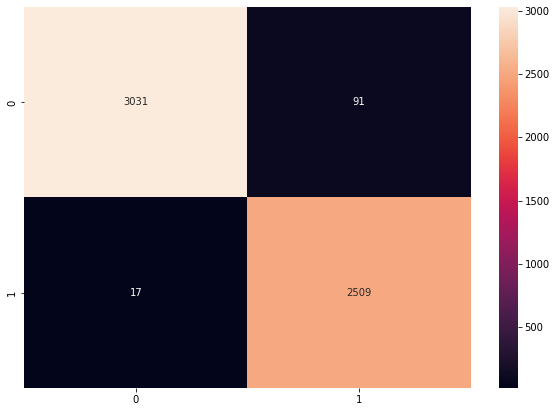

In [101]:
print('Model: Neural Networks')
print('Accuracy: 0.9809')
print('Precision:',precision_score(y_test,y_prn))
print('AUC:',roc_auc_score(y_test,y_prn ))
cmm = confusion_matrix(y_test,y_prn)
sns.heatmap(cmm, annot=True, fmt='d')
plt.show()

AS, we compared many ML classifiers to see which one will be best for the detection of the fraud. Although, the model accuracy score was very high for all the models, which is a clear sign of an imbalaned class. So, the names of the ML models according to their best AUC scores are:

(i) Xg Boost (0.995)

(ii) Random Forest (0.992)

(iii) Gadiant Boost (0.987)

(iv) Neural Networks (0.982)

(v) Ada Boost (0.972)

Neural Networks would have been performed better if the dataset would have been huge. Even building a highly complex model by increasing the number of layers, we are not much benifited. 